# PyTorch Basics

## 0. Setup

### Torch

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.0
    Uninstalling torchaudio-0.12.0:
      Successfully uninstalled torchaudio-0.12.0


In [3]:
import torch

In [5]:
# Tenors are numbers, vectors or mutidimesonoal arrays
t1 = torch.tensor(4.)
t1

tensor(4.)

In [6]:
t1.dtype

torch.float32

In [7]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [10]:
# Matrix
t3 = torch.tensor([[5., 6],
                 [7,8],
                 [9,10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [11]:
# Create Tensors
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [13]:
# Artithemic Opertaions
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [14]:
# Coumpute Direeactives
y.backward

<bound method Tensor.backward of tensor(17., grad_fn=<AddBackward0>)>

### Numpy

In [15]:
import numpy as np

In [18]:
x = np.array([[1,2],
              [3,4]])
x

array([[1, 2],
       [3, 4]])

In [19]:
# Covert from numpy array
y = torch.from_numpy(x)
y

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

## Working With Datasets

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root="data/", download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [5]:
len(dataset)

60000

In [6]:
import matplotlib.pyplot as plt

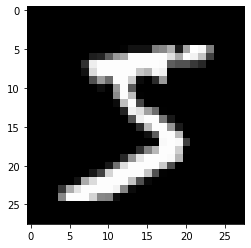

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap="gray")

In [8]:
import torchvision.transforms as transforms

In [11]:
dataset = MNIST(root="data/",
               train=True,
               transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


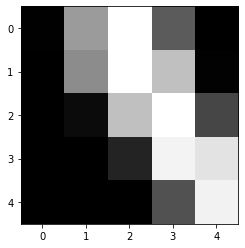

In [15]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [20]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

In [21]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [22]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0184, -0.0225, -0.0018,  ...,  0.0151,  0.0314,  0.0138],
        [ 0.0237,  0.0079,  0.0016,  ..., -0.0262, -0.0053, -0.0062],
        [ 0.0202, -0.0307,  0.0072,  ...,  0.0024,  0.0276,  0.0101],
        ...,
        [ 0.0146, -0.0347,  0.0099,  ..., -0.0080,  0.0055, -0.0095],
        [ 0.0334,  0.0070,  0.0109,  ..., -0.0174, -0.0299, -0.0124],
        [-0.0002, -0.0110,  0.0173,  ..., -0.0082, -0.0176,  0.0166]],
       requires_grad=True)

In [23]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0172,  0.0069, -0.0353,  0.0241,  0.0097,  0.0330, -0.0151, -0.0207,
         0.0339,  0.0328], requires_grad=True)

In [24]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    output = model(images)
    print(outputs)
    break

tensor([9, 5, 3, 2, 4, 2, 0, 3, 4, 2, 3, 8, 2, 0, 6, 0, 0, 5, 5, 2, 9, 8, 5, 6,
        0, 9, 4, 7, 9, 9, 3, 8, 2, 7, 8, 0, 5, 3, 9, 6, 9, 3, 3, 5, 2, 1, 7, 8,
        9, 1, 8, 3, 2, 4, 8, 4, 7, 4, 9, 6, 8, 4, 8, 9, 7, 0, 8, 5, 8, 0, 8, 3,
        0, 7, 3, 3, 1, 8, 7, 8, 0, 7, 7, 2, 9, 2, 2, 3, 0, 1, 3, 8, 6, 6, 2, 3,
        6, 2, 9, 9, 4, 3, 7, 7, 0, 5, 3, 7, 8, 9, 1, 3, 9, 3, 7, 8, 0, 5, 7, 4,
        0, 7, 0, 4, 4, 8, 1, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [25]:
images.shape

torch.Size([128, 1, 28, 28])

In [26]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [33]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [34]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [35]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0323, -0.0344, -0.0161,  ..., -0.0320,  0.0254, -0.0025],
         [-0.0318, -0.0112,  0.0077,  ...,  0.0357, -0.0271, -0.0108],
         [-0.0332,  0.0261,  0.0241,  ...,  0.0135,  0.0065,  0.0311],
         ...,
         [-0.0050, -0.0295,  0.0044,  ...,  0.0228,  0.0309,  0.0152],
         [-0.0035,  0.0223,  0.0241,  ...,  0.0076, -0.0132,  0.0027],
         [-0.0286,  0.0012,  0.0049,  ..., -0.0140, -0.0305, -0.0303]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0222,  0.0227,  0.0127,  0.0123, -0.0028,  0.0292,  0.0205,  0.0168,
          0.0015,  0.0270], requires_grad=True)]

In [36]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print("outputs.shape: ", outputs.shape)
print("sample outputs :\n: ", outputs[:2].data)

outputs.shape:  torch.Size([128, 10])
sample outputs :
:  tensor([[ 0.1540, -0.1407,  0.0666,  0.1173, -0.1026,  0.0477,  0.2340, -0.4623,
          0.0286,  0.1627],
        [-0.0094,  0.0009,  0.0898, -0.0129, -0.2146, -0.0518, -0.0645, -0.0362,
          0.0005,  0.3031]])


In [37]:
import torch.nn.functional as F

In [40]:
probs = F.softmax(outputs, dim=1)

print("Sample probs:\n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample probs:
 tensor([[0.1135, 0.0845, 0.1040, 0.1094, 0.0878, 0.1020, 0.1229, 0.0613, 0.1001,
         0.1145],
        [0.0982, 0.0992, 0.1085, 0.0979, 0.0800, 0.0941, 0.0930, 0.0956, 0.0992,
         0.1343]])
Sum:  1.0000001192092896


In [42]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 9, 5, 2, 9, 9, 2, 9, 3, 5, 9, 9, 3, 5, 9, 9, 2, 6, 2, 0, 5, 5, 5, 5,
        9, 3, 5, 9, 0, 9, 9, 0, 6, 5, 9, 9, 3, 4, 9, 0, 2, 9, 9, 2, 5, 0, 9, 9,
        5, 9, 0, 9, 9, 5, 8, 9, 6, 6, 1, 9, 5, 2, 0, 8, 9, 5, 1, 6, 2, 9, 6, 0,
        9, 0, 9, 2, 9, 9, 0, 0, 8, 5, 9, 9, 5, 2, 9, 6, 5, 9, 2, 5, 3, 0, 0, 9,
        9, 9, 9, 0, 5, 9, 9, 6, 0, 9, 6, 0, 0, 9, 9, 9, 9, 6, 2, 0, 6, 9, 9, 8,
        8, 5, 8, 9, 9, 0, 3, 9])
tensor([0.1229, 0.1343, 0.1238, 0.1373, 0.1472, 0.1423, 0.1315, 0.1937, 0.1227,
        0.1305, 0.1356, 0.1359, 0.1226, 0.1273, 0.1494, 0.1162, 0.1214, 0.1324,
        0.1460, 0.1303, 0.1341, 0.1231, 0.1161, 0.1210, 0.1381, 0.1189, 0.1481,
        0.1279, 0.1369, 0.1267, 0.1278, 0.1201, 0.1302, 0.1253, 0.1388, 0.1220,
        0.1286, 0.1204, 0.1316, 0.1469, 0.1579, 0.1449, 0.1422, 0.1252, 0.1165,
        0.1284, 0.1325, 0.1268, 0.1414, 0.1386, 0.1357, 0.1369, 0.1486, 0.1231,
        0.1172, 0.1397, 0.1229, 0.1341, 0.1255, 0.1380, 0.1415, 0.1168, 0.1497,
       

## Accuracy

In [43]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [44]:
accuracy(outputs, labels)

tensor(0.1250)

In [45]:
loss_fn = F.cross_entropy

In [46]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3056, grad_fn=<NllLossBackward0>)


## Training

In [55]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [56]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [57]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [58]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.330965757369995, 'val_acc': 0.07179588824510574}

In [59]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9584, val_acc: 0.6144
Epoch [1], val_loss: 1.6880, val_acc: 0.7234
Epoch [2], val_loss: 1.4869, val_acc: 0.7554
Epoch [3], val_loss: 1.3353, val_acc: 0.7739
Epoch [4], val_loss: 1.2192, val_acc: 0.7874


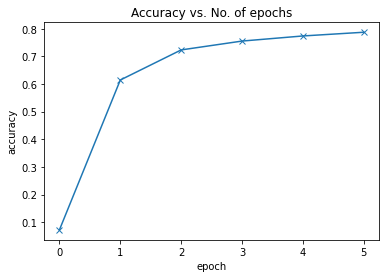

In [61]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [62]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


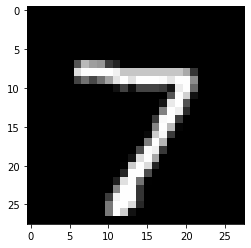

In [63]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [64]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


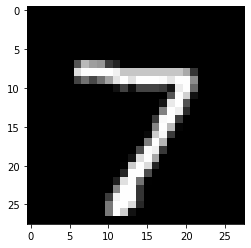

In [65]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [66]:
torch.save(model.state_dict(), "mnist-logistic.pth")

In [67]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0252,  0.0021,  0.0293,  ..., -0.0059,  0.0117,  0.0179],
                      [ 0.0340, -0.0114, -0.0097,  ..., -0.0338, -0.0254, -0.0225],
                      [-0.0333,  0.0049, -0.0282,  ..., -0.0238,  0.0070,  0.0340],
                      ...,
                      [ 0.0308,  0.0258,  0.0116,  ..., -0.0015, -0.0080, -0.0228],
                      [ 0.0204, -0.0063, -0.0208,  ..., -0.0196,  0.0253, -0.0230],
                      [-0.0038, -0.0231,  0.0034,  ..., -0.0094, -0.0333,  0.0071]])),
             ('linear.bias',
              tensor([ 0.0080,  0.0168, -0.0044, -0.0354,  0.0050, -0.0271, -0.0382,  0.0406,
                      -0.0086, -0.0348]))])